In [6]:
import pandas as pd
from sklearn.linear_model import Lasso, LassoCV, LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, explained_variance_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.decomposition import PCA

# Import the Data
Load the data from the csv file, and set FoodCode to be the data index

In [2]:
data = pd.read_csv('../data/training_for_GS_122118.csv')
data = data.set_index('FoodCode')

Get the indices of all columns except description and lactose content - these columns are the numerical features that will be used as model input

In [3]:
numerical_features = data.columns[1:-1]

# Prepare data for modelling

Use only the numerical features as model input `X`  
Use sklearn's Standard Scaler on these features: standardize features by removing the mean and scaling to unit variance  
Convert back to a dataframe for convenience

In [7]:
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(data[numerical_features]),columns=data[numerical_features].columns)
X.head()

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,KCAL,PROT,TFAT,CARB,MOIS,ALC,CAFF,SUGR,FIBE,CALC,...,P182,P183,P184,P204,P205,P225,P226,VITD,CHOLN,year
0,0.702498,-0.107073,-0.255593,2.029871,-1.272677,-0.081228,-0.106147,3.315742,-0.733664,0.479038,...,-0.340521,-0.213564,-0.235027,-0.425155,-0.273708,-0.344888,-0.282114,-0.218465,1.701262,-1.226096
1,-1.178711,-0.622714,-0.817326,-0.712226,1.230875,-0.081228,-0.106147,-0.222954,-0.610571,-0.179715,...,-0.377025,-0.604177,-0.235027,-0.425155,-0.273708,-0.344888,-0.282114,0.834216,-0.233236,-1.226096
2,-0.908979,-0.512824,-0.585036,-0.621834,1.005822,-0.081228,-0.106147,-0.041202,-0.733664,-0.201821,...,-0.357096,-0.420557,-0.235027,-0.321806,-0.273708,-0.344888,-0.282114,0.834216,0.669716,-1.226096
3,0.951482,1.340827,-0.788838,2.704954,-2.085663,-0.081228,0.321872,4.147861,-0.487477,0.483459,...,-0.334404,-0.514036,-0.235027,-0.425155,-0.273708,-0.344888,-0.282114,-0.429001,3.359004,-1.226096
4,-0.943560,-0.730190,-0.807100,-0.190467,0.881982,-0.081228,-0.071905,0.095295,-0.487477,-0.330035,...,-0.376039,-0.570791,-0.235027,-0.425155,-0.273708,-0.344888,-0.282114,0.202608,-0.484833,-1.226096


Use lactose as prediction target `Y`

In [8]:
Y = data['lac.per.100g']
Y.head()

FoodCode
11220000    11.45000
11516000     5.79759
11531000     5.13504
11830800    21.31081
13210250     0.22385
Name: lac.per.100g, dtype: float64

In [71]:
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X),columns=['PC1','PC2'],index=X.index)
X_pca['lac'] = data['lac.per.100g'].values

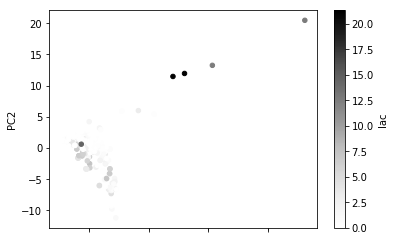

In [75]:
X_pca.plot.scatter('PC1','PC2',c='lac')

# Fit Lasso

In [55]:
param_grid = {'alpha': np.logspace(-3, -1, 100)} #values of alpha to search over

refit = 'explained_variance'

search = GridSearchCV(estimator=Lasso(),param_grid=param_grid,scoring=('neg_mean_squared_error','r2','explained_variance'),refit=refit,cv=10)
search.fit(X,Y) #fit the best model to the full dataset, best model is chosen by lowest MSE in cross validation

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.001  , 0.00105, ..., 0.09545, 0.1    ])},
       pre_dispatch='2*n_jobs', refit='explained_variance',
       return_train_score='warn',
       scoring=('neg_mean_squared_error', 'r2', 'explained_variance'),
       verbose=0)

# Best alpha

In [56]:
search.best_estimator_.alpha

0.05214008287999687

# Test R^2 value

In [57]:
search.cv_results_['mean_test_r2'][np.argmax(search.cv_results_['mean_test_'+refit])]

0.36358103025078875

In [58]:
search.cv_results_['mean_test_explained_variance'][np.argmax(search.cv_results_['mean_test_'+refit])]

0.3900640822044903

## training R^2 after fitting to full dataset

In [313]:
lasso.score(X,Y)

0.6755035400168654

In [314]:
def plot_r2(model):
    y_pred = model.predict(X)
    plt.scatter(x=Y,y=y_pred)

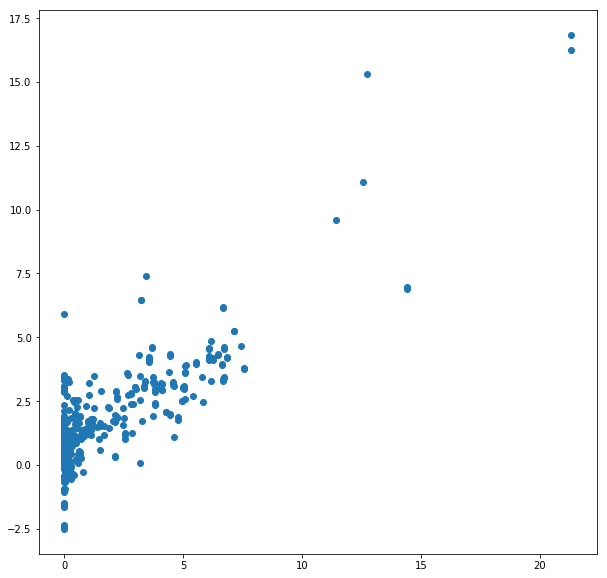

In [315]:
plot_r2(lasso)

# Fit bounded Lasso

In [25]:
class BoundedLasso(BaseEstimator,RegressorMixin):
    def __init__(self, alpha=None):
        self.alpha = alpha
        
    def fit(self,X,y):
        self.lasso = Lasso(self.alpha)
        self.lasso.fit(X,y)
    
    def get_coef(self):
        return self.lasso.coef_
    
    def predict(self, x):
        pred_orig = self.lasso.predict(x)
        return np.clip(pred_orig,0,np.max(pred_orig))

In [26]:
param_grid = {'alpha': np.logspace(-3, -1, 100)}

search = GridSearchCV(estimator=BoundedLasso(),param_grid=param_grid,scoring=('neg_mean_squared_error','r2'),refit='neg_mean_squared_error',cv=10)
search.fit(X,Y)

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=BoundedLasso(alpha=None), fit_params=None, iid='warn',
       n_jobs=None,
       param_grid={'alpha': array([0.001  , 0.00105, ..., 0.09545, 0.1    ])},
       pre_dispatch='2*n_jobs', refit='neg_mean_squared_error',
       return_train_score='warn', scoring=('neg_mean_squared_error', 'r2'),
       verbose=0)

In [29]:
search.best_estimator_.alpha

0.04328761281083059

In [30]:
search.cv_results_['mean_test_r2'][np.argmax(search.cv_results_['mean_test_neg_mean_squared_error'])]

0.38489032671670603

## Training r^2 plot

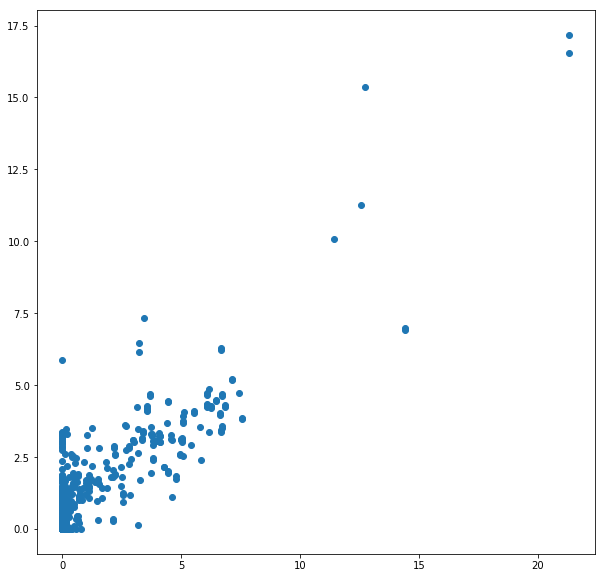

In [361]:
plot_r2(bounded_lasso)

## Feature importances

In [366]:
def plot_coefficients(model):
    try:
        nonzero_coef_index = model.coef_ != 0
        coefficients = pd.DataFrame()
        coefficients['Feature'] = X.columns
        coefficients['coef'] = model.coef_
    except AttributeError:
        nonzero_coef_index = model.get_coef() != 0
        coefficients = pd.DataFrame()
        coefficients['Feature'] = X.columns
        coefficients['coef'] = model.get_coef()
    axs = coefficients[coefficients['coef']!=0].sort_values('coef').plot.barh(x='Feature',y='coef')
    axs.set_title('Feature Coefficients')
    axs.set_xlabel('Coefficient')



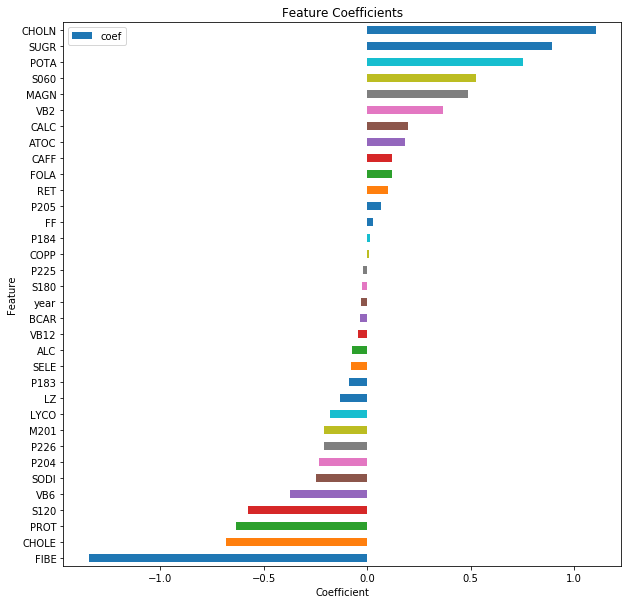

In [367]:
plot_coefficients(bounded_lasso)

# To do:
k-best features?

In [31]:
# logreg = LogisticRegressionCV(scoring='f1',max_iter=1000)

In [32]:
# Y_binary = Y != 0

In [33]:
# logreg.fit(X,Y_binary)

In [34]:
# logreg.score(X,Y_binary)

In [35]:
# logreg.C_

In [36]:
# logreg.predict(X)

In [37]:
class BoundedLassoPlusLogReg(BaseEstimator,RegressorMixin):
    def __init__(self, alpha=None, C=None):
        self.alpha = alpha
        self.C = C

    def fit(self,X,y):
        self.bounded_lasso = BoundedLasso(alpha=self.alpha)
        self.logreg = LogisticRegression(penalty='l2',C=self.C,solver='lbfgs')
        self.bounded_lasso.fit(X,y)
        y_binary = y != 0
        self.logreg.fit(X,y_binary)
        return self
        
    def predict(self, X):
        pred_lasso = self.bounded_lasso.predict(X)
        pred_logreg = self.logreg.predict(X)
        pred = np.multiply(pred_lasso,pred_logreg)
        return pred

In [45]:
param_grid = {'alpha': np.logspace(-3, -1, 10), 'C': np.logspace(-4, 4, 10)}
# param_grid = {'alpha': [.043], 'C': [2.78,0.04]}
search = GridSearchCV(estimator=BoundedLassoPlusLogReg(),param_grid=param_grid,scoring=('neg_mean_squared_error','r2'),refit='r2',cv=10)
search.fit(X,Y)

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packa

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. F

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-pac

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. F

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-pac

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-pac

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. F

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-pac

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-pac

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. F

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-pac

C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Gabriel\AppData\Local\conda\conda\envs\DairyML\lib\site-pac

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=BoundedLassoPlusLogReg(C=None, alpha=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.001  , 0.00167, 0.00278, 0.00464, 0.00774, 0.01292, 0.02154,
       0.03594, 0.05995, 0.1    ]), 'C': array([1.00000e-04, 7.74264e-04, 5.99484e-03, 4.64159e-02, 3.59381e-01,
       2.78256e+00, 2.15443e+01, 1.66810e+02, 1.29155e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit='r2', return_train_score='warn',
       scoring=('neg_mean_squared_error', 'r2'), verbose=0)

In [46]:
search.best_estimator_

BoundedLassoPlusLogReg(C=0.046415888336127774, alpha=0.05994842503189409)

In [47]:
np.max(search.cv_results_['mean_test_r2'])

0.38740269831967816

In [43]:
# search.cv_results_['mean_test_r2'][np.argmax(search.cv_results_['mean_test_neg_mean_squared_error'])]

0.3748719235996142

## Fit to the full dataset

In [415]:
search.best_estimator_.score(X,Y)

0.7800166661405215